In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import numpy as np
from PIL import Image

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
BASE_PATH = "/content/drive/MyDrive/ML_lab"
CSV_PATH = f"{BASE_PATH}/english.csv"

In [25]:
df = pd.read_csv(CSV_PATH)

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nHead:")
df.head()

Shape: (3410, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB
None

Head:


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [26]:
df.isnull().sum()

,0
image,0
label,0


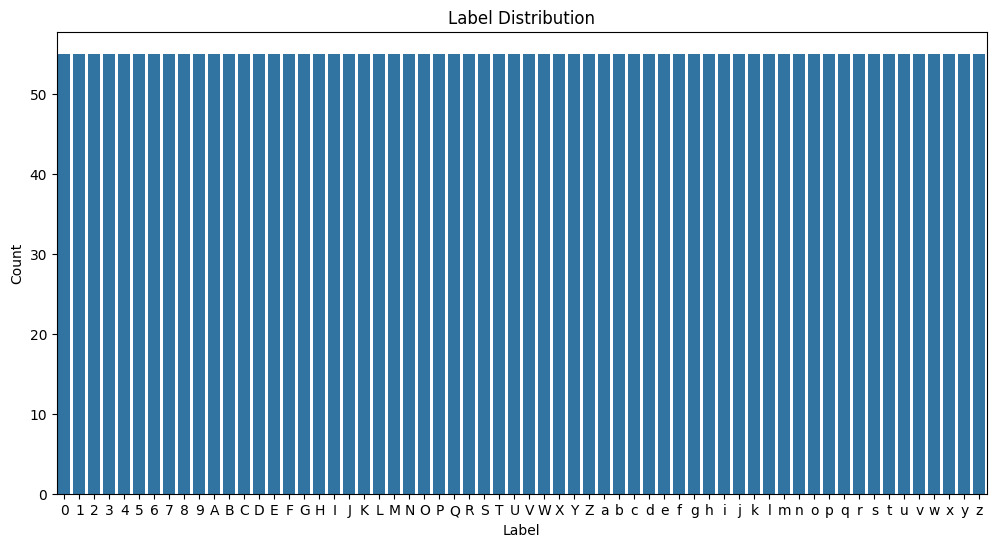

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

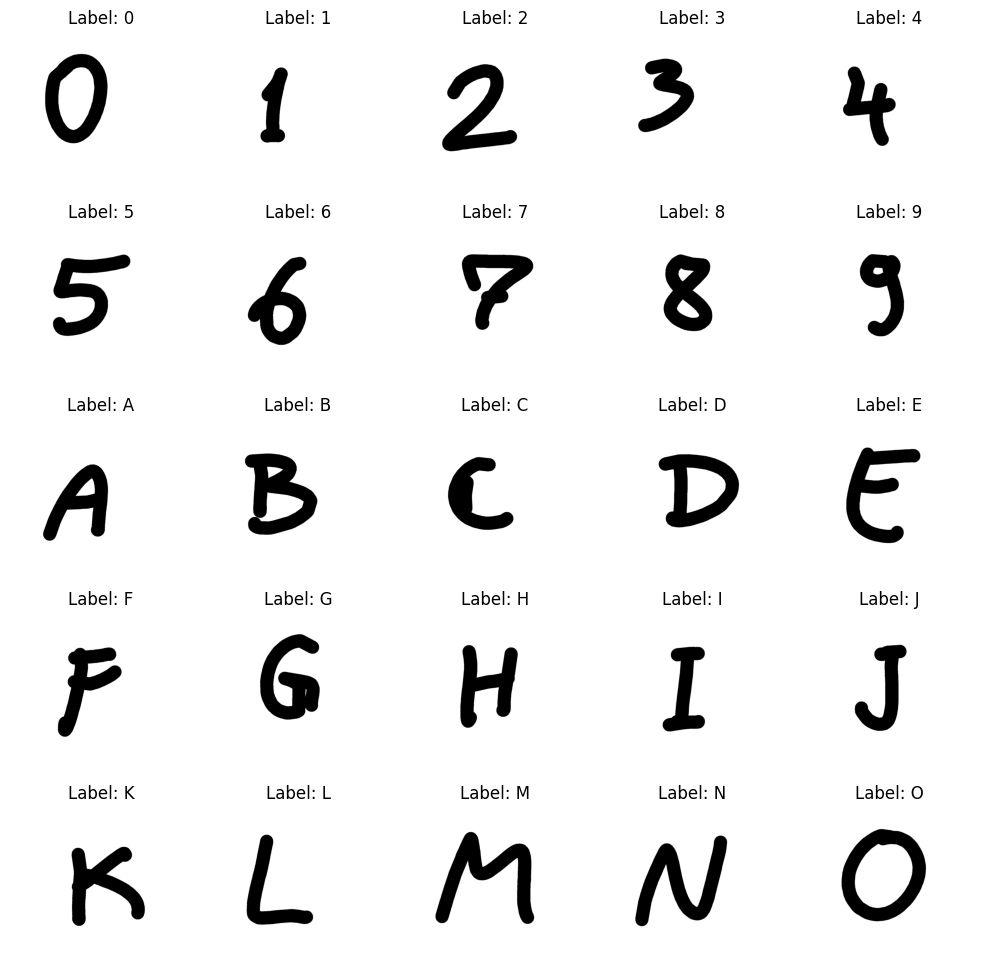

In [27]:
plt.figure(figsize=(10, 10))

sample_df = df.groupby('label').first().reset_index().head(25)

for i, row in sample_df.iterrows():
    img_path = f"{BASE_PATH}/{row['image']}"   # <-- key line

    if not os.path.exists(img_path):
        print("Missing:", img_path)
        continue

    img = Image.open(img_path).convert('L')

    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {row['label']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

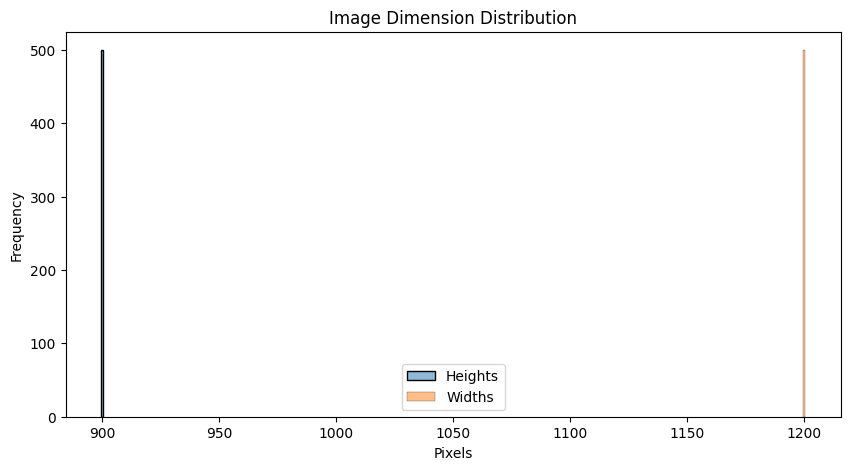

In [30]:
heights = []
widths = []

for img_name in df['image'][:500]:   # sample for speed
    img = Image.open(f"{BASE_PATH}/{img_name}")
    w, h = img.size
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(10,5))
sns.histplot(heights, kde=True, label="Heights")
sns.histplot(widths, kde=True, label="Widths")
plt.legend()
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.show()